In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import sys
sys.path.insert(1, '../utils/')
import src_utils
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import scipy

In [2]:
filename = '../raw_data/20200918_dose_response_gm_format.summary'
growth_rates = pd.read_csv(filename, index_col='Well', delimiter='\t', skiprows=1)

# Append columns with variant and corresponding
row_dict = {
    'A' : 0,
    'B' : 0.05,
    'C' : 0.1,
    'D' : 0.5,
    'E' : .75,
    'F' : 10
}

variant_list = []
concentration_list = []

for well in growth_rates.index.tolist():
    
    row = well[0]
    col = int(well[1:])
    
    if well == 'C7':
        variant_list.append(np.nan)
        concentration_list.append(np.nan)
        continue
    
    if row in row_dict:
        concentration_list.append(row_dict[row])
    else:
        concentration_list.append(np.nan)
        
        
    if col < 4:
        variant_list.append('WT')
    elif col < 7:
        variant_list.append('Empty')
    elif col < 10:
        variant_list.append('E381K')
    else:
        variant_list.append(np.nan)
        
growth_rates['Variant'] = variant_list
growth_rates['Concentration'] = concentration_list

In [3]:
# Collect growth rate averages and errors for each condition tested

variants = ['WT', 'Empty', 'E381K']
concentrations = np.array([0, 0.5, 1, 5, 7.5, 10]) / 10

gr_aves = np.zeros((len(variants), len(concentrations)))
gr_stds = np.zeros((len(variants), len(concentrations)))

for i, variant in enumerate(variants):
    var_df = growth_rates[growth_rates['Variant'] == variant]
    
    for j, conc in enumerate(concentrations):
        conc_df = var_df[growth_rates['Concentration'] == conc]
        rates = conc_df['Rate'].values
        ave_gr = np.mean(rates)
        std_gr = np.std(rates)
        
        gr_aves[i, j] = ave_gr
        gr_stds[i, j] = std_gr


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


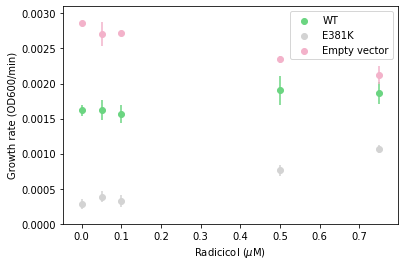

In [5]:
x = concentrations
y = gr_aves[0, :]
col='#6bd581'
plt.scatter(x, y, c=col, label='WT')
plt.errorbar(x, y, yerr=gr_stds[0, :], fmt='none', c=col)

y = gr_aves[2, :]
col = 'lightgrey'
plt.scatter(x, y, c=col, label='E381K')
plt.errorbar(x, y, yerr=gr_stds[2, :], fmt='none', c=col)

y = gr_aves[1, :]
col='#f3b2ca'
plt.scatter(x, y, c=col, label='Empty vector')
plt.errorbar(x, y, yerr=gr_stds[1, :], fmt='none', c=col)

plt.ylim([0,0.0031])
plt.ylabel('Growth rate (OD600/min)')
plt.xlabel('Radicicol ($\mu$M)')
plt.legend()
plt.savefig('sf1.png')